In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
df=pd.read_csv("c:/data/energy/ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [11]:
train_cols = df.columns[0:8]
print(train_cols)
X=df[train_cols] # 독립변수
y=df["Y1"] # 난방 하중
print(df[train_cols].head())
print(y.head())

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')
     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64


Text(0, 0.5, 'Y1')

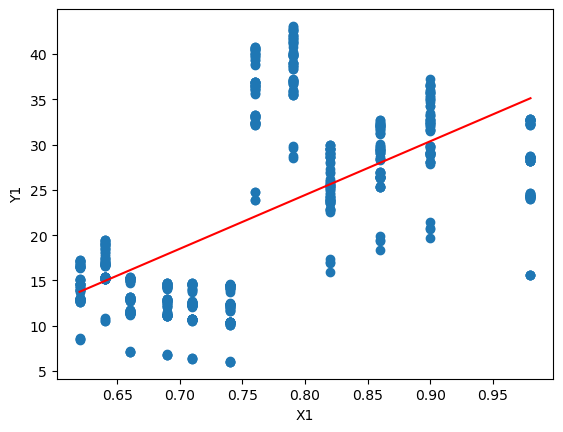

In [14]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
#산점도 그리기
plt.scatter(x2,y2)
#회귀선 그리기
plt.plot(x2, slope*x2 +intercept, c="red")
plt.xlabel("X1")
plt.ylabel("Y1")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
#다중 회귀분석
import statsmodels.api as sm
model=sm.OLS(y_train, X_train)
result=model.fit()
print("회귀계수\n",result.params)
print("R-squared\n",result.rsquared)
print("P values\n",result.pvalues)
#요약 결과 출력
print(result.summary())
# 모델의 설명력 98.5%
# p-value : X6(건물의 방위)은 유의하지 않음
# 해석
# X1(상대적 크기) : 건물이 크면 난방 비용이 감소한다.
# X7(유리창 면적) : 유리창 면적이 크면 난방 비용이 증가한다.
# X5(전체 높이) : 건물 높이가 높으면 난방 비용이 증가한다.

회귀계수
 X1   -21.114384
X2    -0.003032
X3     0.031192
X4    -0.017112
X5     5.385563
X6    -0.017253
X7    20.405945
X8     0.213261
dtype: float64
R-squared
 0.9848599675190215
P values
 X1    3.436249e-22
X2    4.057924e-02
X3    1.997717e-12
X4    1.889720e-09
X5    1.367608e-73
X6    8.760142e-01
X7    1.358458e-77
X8    9.518520e-03
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                     Y1   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              5641.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:52:00   Log-Likelihood:                         -1550.9
No. Observations:                 614   AIC:                                      3116.
Df Residuals:               

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train, y_train)

In [18]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9123488471973691
검증용: 0.9313289941747572


In [19]:
# X6을 제외한 모델
train_cols=df.columns[[0,1,2,3,4,6,7]]
print(train_cols)
X=df[train_cols] # 독립변수
y=df["Y1"] # 난방 하중
print(df[train_cols].head())
print(y.head())

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X8'], dtype='object')
     X1     X2     X3      X4   X5   X7  X8
0  0.98  514.5  294.0  110.25  7.0  0.0   0
1  0.98  514.5  294.0  110.25  7.0  0.0   0
2  0.98  514.5  294.0  110.25  7.0  0.0   0
3  0.98  514.5  294.0  110.25  7.0  0.0   0
4  0.90  563.5  318.5  122.50  7.0  0.0   0
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64


In [20]:
#다중 회귀분석
import statsmodels.api as sm
model=sm.OLS(y, X)
result=model.fit()
print("회귀계수\n",result.params)
print("R-squared\n",result.rsquared)
print("P values\n",result.pvalues)
#요약 결과 출력
print(result.summary())
# 모델의 설명력 98.5%(개선되지는 않음)
# p-value : 모든 변수가 유의함

회귀계수
 X1   -20.074078
X2    -0.003728
X3     0.032211
X4    -0.017969
X5     5.296006
X7    19.960769
X8     0.206300
dtype: float64
R-squared
 0.9854172860136521
P values
 X1    5.633124e-27
X2    2.812092e-03
X3    9.694136e-17
X4    4.287014e-13
X5    4.060134e-93
X7    1.058102e-96
X8    3.633760e-03
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                     Y1   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8582.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:52:40   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3856.
Df Residuals:                     762   BIC:                   

In [3]:
train_cols=df.columns[0:8]
print(train_cols)
X=df[train_cols] # 독립변수
y=df["Y2"] # 냉방 하중
print(df[train_cols].head())
print(y.head())

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')
     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0
0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Y2, dtype: float64


In [5]:
# 단순회귀분석
# 기울기(slope), 절편(intercept), 상관계수(rvalue), p-value(예측 불확실성의 정도를 나타내는 값)
# 에러의 표준편차(stderr)
# p-value는 0.05 미만일 때 통계적으로 유의함
x2=df["X1"].values
y2=df["Y2"].values
result=stats.linregress(x2,y2)
result

LinregressResult(slope=57.05053290659375, intercept=-19.008355146122057, rvalue=0.6343390663353593, pvalue=1.0608759912586174e-87, stderr=2.5120843906893957, intercept_stderr=1.937931054665182)

Text(0, 0.5, 'Y2')

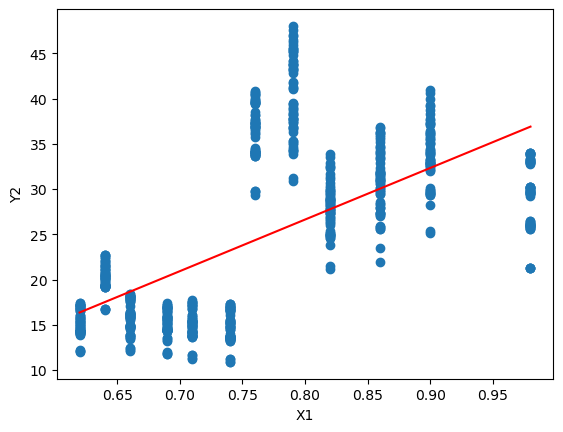

In [6]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
#산점도 그리기
plt.scatter(x2,y2)
#회귀선 그리기
plt.plot(x2, slope*x2 +intercept, c="red")
plt.xlabel("X1")
plt.ylabel("Y2")

In [7]:
#다중 회귀분석
import statsmodels.api as sm
model=sm.OLS(y, X)
result=model.fit()
print("회귀계수\n",result.params)
print("R-squared\n",result.rsquared)
print("P values\n",result.pvalues)
#요약 결과 출력
print(result.summary())
# 모델의 설명력 98.5%
# p-value : X2(건축 표면적),X6(건물의 방위),X8(유리창 면적의 분산)은 유의하지 않음
# 해석
# X1(상대적 크기) : 건물이 크면 냉방비용이 감소된다.
# X7(유리창 면적) : 유리창 면적이 크면 냉방비용이 증가한다.
# X5(전체 높이) : 건물 높이가 높으면 냉방비용이 증가한다.

회귀계수
 X1   -19.013495
X2     0.002107
X3     0.017989
X4    -0.007941
X5     5.588124
X6     0.129937
X7    14.749602
X8     0.043625
dtype: float64
R-squared
 0.9849864771252053
P values
 X1    8.097264e-21
X2    1.283383e-01
X3    1.593725e-05
X4    3.001620e-03
X5    3.534444e-88
X6    2.150330e-01
X7    6.492365e-52
X8    5.727529e-01
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                     Y2   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7132.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:40:13   Log-Likelihood:                         -1990.2
No. Observations:                 768   AIC:                                      3994.
Df Residuals:               

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#데이터셋을 나눔(학습용:검증용 = 8:2)
#random_state : 난수 발생을 위한 seed의 인자값
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)
model=LinearRegression().fit(X_train, y_train)

In [9]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.882472464160759
검증용: 0.9079786235531351


In [ ]:
# X6 제외